In addition to the other sources (Uniprot, official Website), there is another Uniprot annotation file from EBI. Are there any differences? Is the EBI file better than the other options?

According to the comments in the file, it is generated by Uniprot, and contains annotations for all proteins in Uniprot! This file could contain the qualifiers and evidence codes we have been missing from the Uniprot custom download file. 

## TODO:

- Analyze file
- Filter down
    - Molecular function
    - enables
- Compare to other GO datasets
    - GO annotation from Uniprot custom download
    - Uniprot annotation from GO website
        - IEA, non-IEA
- Write script for filtering file, and saving it as xz

In [1]:
# !This file contains all GO annotations and gene product information for proteins in the UniProt KnowledgeBase (UniProtKB),
# !ComplexPortal protein complexes, and RNAcentral identifiers.
# !
# !date-generated: 2022-11-17 13:42
# !generated-by: UniProt
# !go-version: http://purl.obolibrary.org/obo/go/releases/2022-11-12/extensions/go-plus.owl
# !


In [2]:
import pandas as pd



TODO remove drop_dupl, sort_values after command has finished

In [1]:
from subpred.util import pickle_read

df_go_ebi = pickle_read(
    "../data/raw/gene_ontology/goa_uniprot_all_ebi_filtered.tsv.xz",
    header=None,
    names=["Uniprot", "qualifier", "go_id", "evidence_code", "aspect", "date"],
)

Creating cache file ../data/raw/gene_ontology/goa_uniprot_all_ebi_filtered.tsv.xz.1676900041.184084.pkl...


In [2]:
from subpred.dataset import create_dataset
df_uniprot = create_dataset(
    input_file="../data/raw/uniprot/uniprot_2022_05_evidence1-2_nofragments.tsv",
    # keywords_classes = None,
    # keywords_classes_all = SUBSTRATE_KEYWORDS,
    # keywords_filter = None,
    multi_substrate="keep",
    # outliers=outliers,
    verbose=True,
    # tax_ids_filter=[3702, 9606, 83333, 559292],
    # sequence_clustering=70,
    evidence_code=2,
    invalid_amino_acids="remove_amino_acids",
    # gene_names_only = True,
    # force_update=True,
    # remove_sequence_fragments = True,
    # force_update = False,
    tcdb_substrates_file="../data/raw/tcdb/tcdb_substrates.tsv",
    swissprot_only=False,
)

Found pickle, reading...


In [16]:
from subpred.go_utils import  GeneOntology, GO_FILE, EVIDENCE_CODE_TO_DESCRIPTION

go = GeneOntology(GO_FILE) 

In [5]:
# df_go_ebi
from subpred.dataset import get_go_df

df_uniprot_go = get_go_df(df_uniprot, go)

In [7]:
df_go_ebi

,Uniprot,qualifier,go_id,evidence_code,aspect,date
0,A0A000,enables,GO:0003824,IEA,F,20230125
1,A0A000,enables,GO:0003870,IEA,F,20230125
2,A0A000,enables,GO:0030170,IEA,F,20230125
3,A0A000,involved_in,GO:0009058,IEA,P,20230125
4,A0A000,involved_in,GO:0033014,IEA,P,20230125
...,...,...,...,...,...,...
710667173,Z9JZ82,involved_in,GO:0046677,IEA,P,20230125
710667174,Z9JZ82,involved_in,GO:0055085,IEA,P,20230125
710667175,Z9JZ82,located_in,GO:0005886,IEA,C,20230125
710667176,Z9JZ82,located_in,GO:0016020,IEA,C,20230125


In [22]:
df_go_ebi_filtered = df_go_ebi[df_go_ebi.Uniprot.isin(df_uniprot.index)]

<AxesSubplot:>

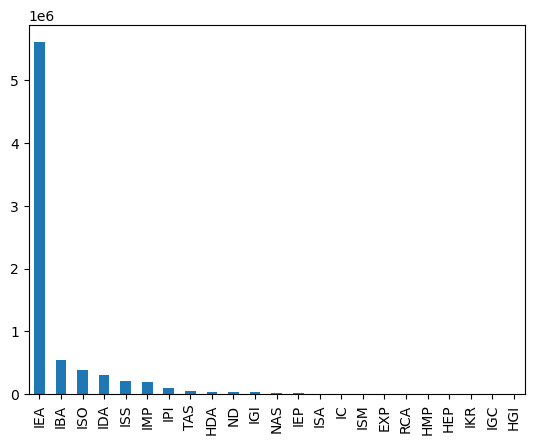

In [26]:
df_go_ebi_filtered.evidence_code.value_counts(dropna=False).plot.bar()

<AxesSubplot:>

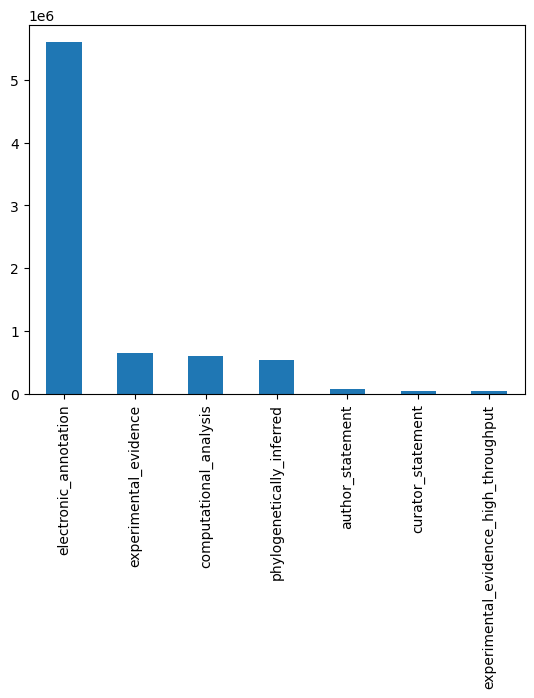

In [24]:
df_go_ebi_filtered.evidence_code.map(EVIDENCE_CODE_TO_DESCRIPTION).value_counts(dropna=False).plot.bar()

In [27]:
df_go_ebi_filtered.qualifier.value_counts(dropna=False)

enables                                           2749468
involved_in                                       2652864
located_in                                        1687875
part_of                                            221528
is_active_in                                       161989
acts_upstream_of_or_within                          80462
contributes_to                                       8135
colocalizes_with                                     5564
acts_upstream_of                                     3989
NOT|involved_in                                      3167
NOT|enables                                          2829
NOT|located_in                                       1457
acts_upstream_of_or_within_positive_effect            284
acts_upstream_of_positive_effect                      274
NOT|acts_upstream_of_or_within                        138
acts_upstream_of_negative_effect                      130
acts_upstream_of_or_within_negative_effect             78
NOT|part_of   

In [8]:
df_uniprot_go_merged = df_uniprot_go.merge(df_go_ebi, how="left", on=["Uniprot", "go_id"])

<AxesSubplot:>

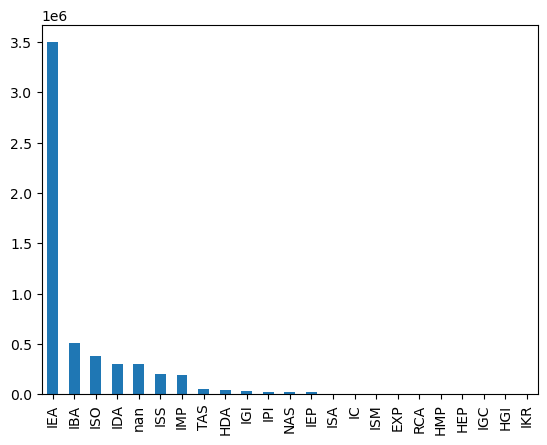

In [15]:
df_uniprot_go_merged.evidence_code.value_counts(dropna=False).plot.bar()

<AxesSubplot:>

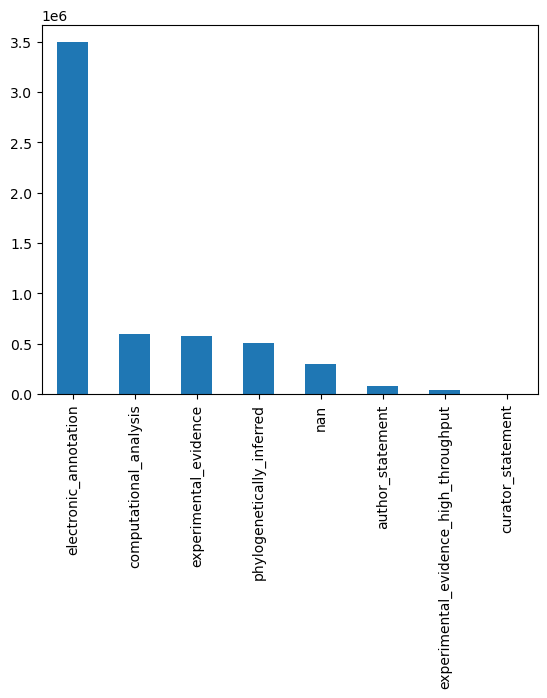

In [18]:
df_uniprot_go_merged.evidence_code.map(EVIDENCE_CODE_TO_DESCRIPTION).value_counts(dropna=False).plot.bar()

In [21]:
df_uniprot_go_merged.qualifier.value_counts(dropna=False)

involved_in                                   1847509
enables                                       1799711
located_in                                    1233726
NaN                                            303991
part_of                                        194438
is_active_in                                   140690
acts_upstream_of_or_within                      78032
acts_upstream_of                                 3927
contributes_to                                   3146
colocalizes_with                                 2169
NOT|involved_in                                   526
NOT|enables                                       475
NOT|located_in                                    342
acts_upstream_of_positive_effect                  237
acts_upstream_of_or_within_positive_effect        229
acts_upstream_of_negative_effect                  122
acts_upstream_of_or_within_negative_effect         72
NOT|acts_upstream_of_or_within                     41
NOT|part_of                 

### Comparison in terms of transmembrane transporter annotations

In [6]:
from subpred.go_utils import GeneOntology, GO_FILE

go_owl = GeneOntology(GO_FILE)